# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Leonard Mars Kurniaputra
- **Email:** leonardmars63@gmail.com
- **ID Dicoding:** leleonnn

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah rental pelanggan casual dan registered di setiap jam?
- Bagaimana perbandingan tren rental setiap harinya pada tahun 2011 dengan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

**Deskripsi Kolom**

* instant   : record index
* dteday    : date
* season    : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr        : year (0: 2011, 1:2012)
* mnth      : month ( 1 to 12)
* hr        : hour (0 to 23)
* holiday   : weather day is holiday or not (extracted from [Web Link])
* weekday   : day of the week
* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit:

  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp      : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp     : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum       : Normalized humidity. The values are divided to 100 (max)
* windspeed : Normalized wind speed. The values are divided to 67 (max)
* casual    : count of casual users
* registered: count of registered users
* cnt       : count of total rental bikes including both casual and registered







### Gathering Data

Memuat dataset **day.csv** dan mengubahnya menjadi DataFrame **day_df**:


In [2]:
day_df = pd.read_csv("./data/day.csv")
day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Memuat dataset **hour.csv** dan mengubahnya menjadi DataFrame **hour_df**:

In [3]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat day.csv dan hour.csv ke dalam sistem.
- Membuat DataFrame day_df dan hour_df dari masing-masing data set.

### Assessing Data

Pada dataFrame **day_df**, digunakan beberapa fungsi untuk menilai data yang ada di dalam dataFrame tersebut, yaitu:
1. `.info()`        -- Memberikan informasi ringkas tentang DataFrame untuk memahami struktur data secara umum.
2. `.isna().sum()`  -- Menunjukkan jumlah nilai *null* dalam DataFrame.
3. `.describe()`    -- Memberikan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada dataFrame **hour_df**, digunakan beberapa fungsi untuk menilai data yang ada di dalam dataFrame tersebut, yaitu:
1. `.info()`        -- Memberikan informasi ringkas tentang DataFrame untuk memahami struktur data secara umum.
2. `.isna().sum()`  -- Menunjukkan jumlah nilai *null* dalam DataFrame.
3. `.describe()`    -- Memberikan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame.

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menguji apakah setiap baris pada kolom "cnt" sudah sesuai jika merupakan penjumlahan kolom "casual" dengan "registered" pada DataFrame

In [10]:
miss = 0
for index, row in hour_df.iterrows():
  if row["casual"] + row["registered"] != row["cnt"]:
    miss += 1

print(f"Jumlah column 'cnt' yang salah: {miss}")

Jumlah column 'cnt' yang salah: 0


In [11]:
miss = 0
for index, row in day_df.iterrows():
  if row["casual"] + row["registered"] != row["cnt"]:
    miss += 1

print(f"Jumlah column 'cnt' yang salah: {miss}")

Jumlah column 'cnt' yang salah: 0


**Insight:**
- Mendapatkan jumlah baris pada day_df dan hour_df.
- Mendapatkan data type setiap kolom pada day_df dan hour_df.
- Tidak ada nilai null pada day_df dan hour_df.
- Setiap nilai pada kolom-kolom day_df dan hour_df sudah berada dalam range yang dideskripsikan pemilik data set.
- Setiap kolom "cnt" pada hour_df dan day_df sudah sesuai dengan penjumlahan kolom "casual" dengan "registered".

### Cleaning Data

**Insight:**
- Karena **tidak ada kesalahan atau noise** pada data set yang diberikan, **Data Cleaning tidak dilakukan**.

## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1

Membandingkan nilai-nilai sum, min, dan max dari kolom "casual" dan "registered" berdasarkan kondisi cuaca "weathersit"

In [12]:
hour_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
weathersit,,
1,462745,1875428
2,134481,661471
3,22783,135548
4,8,215


In [13]:
hour_df.groupby(by="weathersit").agg({
    "casual": ["min", "max"],
    "registered": ["min", "max"]
})

casual      registered     
              min  max        min  max
weathersit                            
1               0  367          0  886
2               0  350          0  822
3               0  263          0  791
4               1    6         22  158

In [14]:
hour_df.groupby(by="weathersit").cnt.sum()

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

Membuat DataFrame baru **count_by_weather_df** berisi kolom "weatersit" dan rata-rata "cnt", "casual", serta "registered" dari DataFrame hour_df yang dikelompokkan berdasarkan kolom "weathersit".

Karena setiap kelompok "weathersit" memiliki frekuensi yang berbeda-beda, digunakan rata-rata untuk mendapat nilai yang ternormalisasi.

> DataFrame ini disiapkan untuk **Pertanyaan #1**



In [15]:
count_by_weather_df = hour_df.groupby("weathersit").agg({
    "cnt": "mean",
    "casual": "mean",
    "registered": "mean"
}).sort_values(by="weathersit", ascending=True).reset_index()
count_by_weather_df.head()

,weathersit,cnt,casual,registered
0,1,204.869272,40.545431,164.323841
1,2,175.165493,29.595290,145.570202
2,3,111.579281,16.055673,95.523608
3,4,74.333333,2.666667,71.666667


### Explore Pertanyaan 2

Mengubah kolom "dteday" menjadi tipe data date time, lalu menghapus nilai tahun untuk bisa membandingkan setiap tanggal pada tahun yang berbeda nantinya.

In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['dteday'] = day_df['dteday'].dt.strftime('%m-%d')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_df["yr"].unique()

array([0, 1], dtype=int64)

Membuat DataFrame baru berdasarkan tahunnya (1: 2011, 2: 2012).

Kolom yang dimasukkan hanya kolom "dteday" dan "cnt" untuk mengurangi redundancy.

> DataFrame ini disiapkan untuk **Pertanyaan #2**

In [19]:
weekday_df_2011 = day_df[day_df["yr"] == 0]
weekday_df_2011["yr"].unique()

weekday_df_2011 = weekday_df_2011[["dteday", "cnt"]].sort_values(by="dteday", ascending=True).reset_index(drop=True)
weekday_df_2011.head()

,dteday,cnt
0,01-01,985
1,01-02,801
2,01-03,1349
3,01-04,1562
4,01-05,1600


In [20]:
weekday_df_2012 = day_df[day_df["yr"] == 1]
weekday_df_2012["yr"].unique()

weekday_df_2012 = weekday_df_2012[["dteday", "cnt"]].sort_values(by="dteday", ascending=True).reset_index(drop=True)
weekday_df_2012.head()

,dteday,cnt
0,01-01,2294
1,01-02,1951
2,01-03,2236
3,01-04,2368
4,01-05,3272


### Insight

**Insight:**
- Mengeksplor dan menyiapkan DataFrame yang akan digunakan sebagai visualisasi dan explanatory untuk pertanyaan 1 dan 2
- Menghapus beberapa kolom dan baris yang tidak diperlukan untuk tahap selanjutnya untuk mengurangi redundancy.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Mengubah kolom "weathersit" menjadi kategorial untuk memudahkan pemahaman pada visualization dan explanatory

In [21]:
count_by_weather_df["weathersit"] = str(count_by_weather_df["weathersit"])
category = ["Cerah", "Berawan", "Ringan", "Ekstrim"]
i = 0

for index, row in count_by_weather_df.iterrows():
  count_by_weather_df.loc[index, "weathersit"] = category[i]
  i += 1

count_by_weather_df.head()

,weathersit,cnt,casual,registered
0,Cerah,204.869272,40.545431,164.323841
1,Berawan,175.165493,29.595290,145.570202
2,Ringan,111.579281,16.055673,95.523608
3,Ekstrim,74.333333,2.666667,71.666667


Membuat **Bar Chart** untuk **Perbandingan Rata-Rata Rental Kategori Pelanggan Dalam Setiap Kondisi Cuaca**

Setiap axis diberi label, dan setiap variabel dicantumkan nilainya dalam legend.

C:\Users\ROG\AppData\Local\Temp\ipykernel_22312\2802075649.py:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.barplot(x="weathersit", y="value", hue="variable",


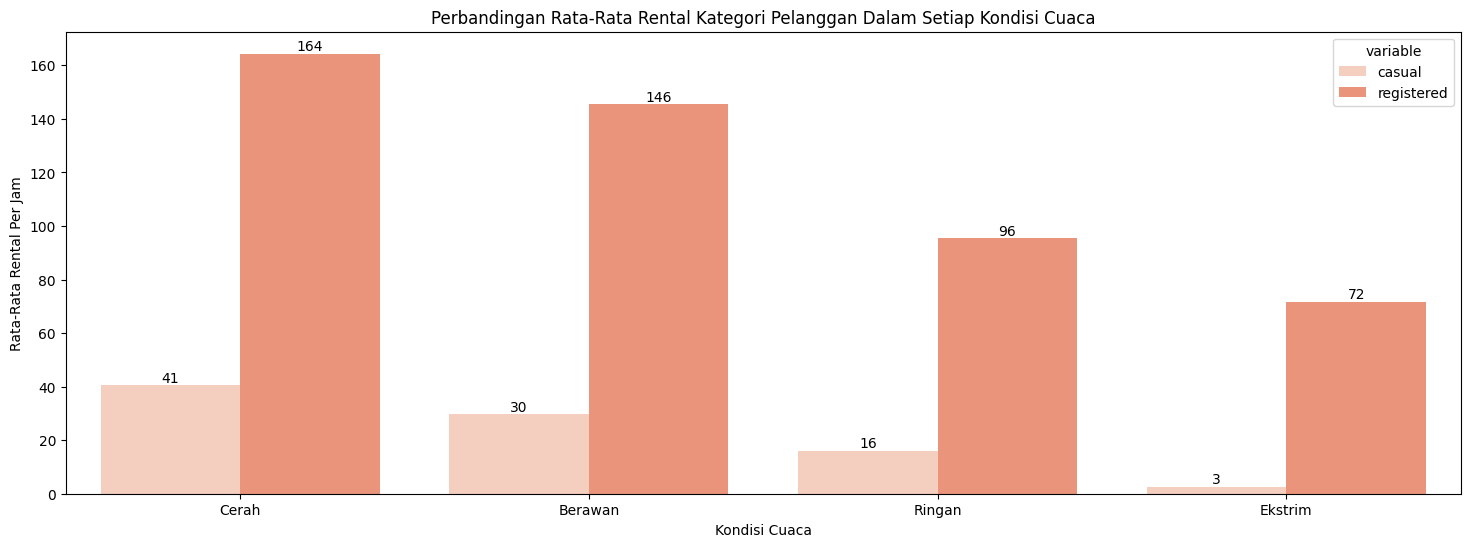

In [22]:
plt.figure(figsize=(18,6))
Palette = sns.color_palette("Reds", n_colors=4)
ax = sns.barplot(x="weathersit", y="value", hue="variable",
                 data=count_by_weather_df.melt(id_vars=["weathersit"], value_vars=["casual", "registered"]),
                 palette=Palette)
plt.ylabel("Rata-Rata Rental Per Jam")
plt.xlabel("Kondisi Cuaca")
plt.title("Perbandingan Rata-Rata Rental Kategori Pelanggan Dalam Setiap Kondisi Cuaca")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

plt.show()

Membuat **Bar Chart** untuk **Perbandingan Rata-Rata Rental Dalam Setiap Kondisi Cuaca**

Setiap axis diberi label, dan setiap variabel dicantumkan nilainya dalam legend.

C:\Users\ROG\AppData\Local\Temp\ipykernel_22312\813779266.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y="cnt", x="weathersit", data=count_by_weather_df, palette=["#FF7F7F"], hue="weathersit", legend=False)


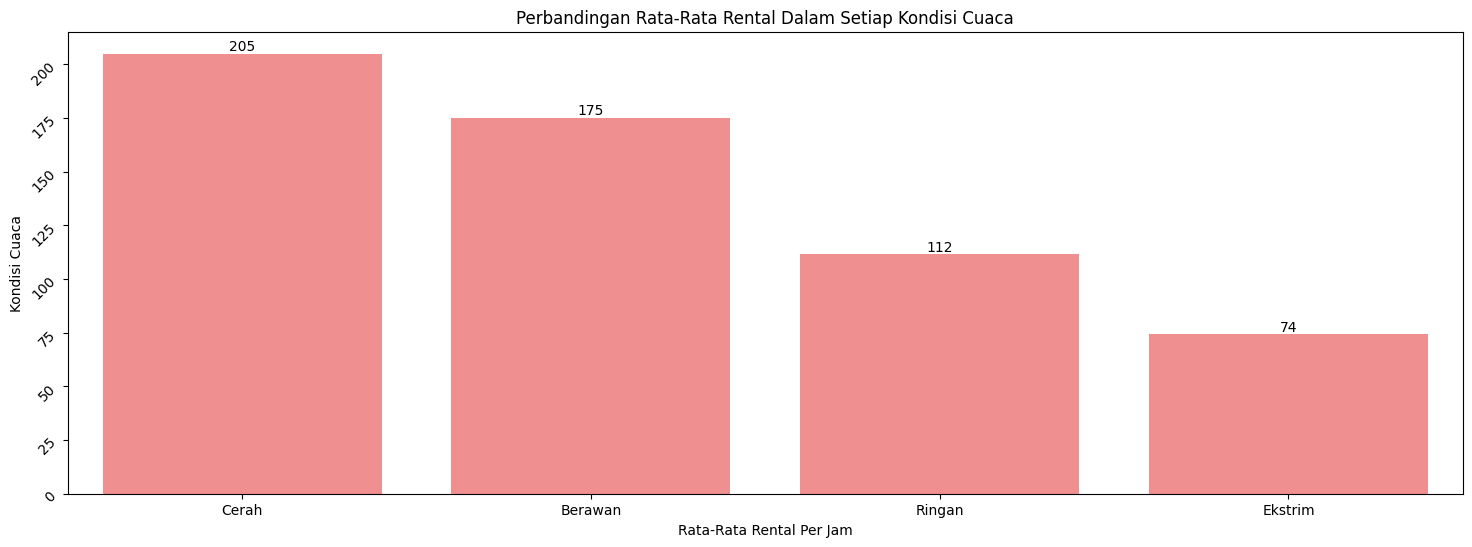

In [31]:
plt.figure(figsize=(18,6))

ax = sns.barplot(y="cnt", x="weathersit", data=count_by_weather_df, palette=["#FF7F7F"], hue="weathersit", legend=False)
plt.xlabel("Rata-Rata Rental Per Jam")
plt.ylabel("Kondisi Cuaca")
plt.yticks(rotation=45)
plt.title("Perbandingan Rata-Rata Rental Dalam Setiap Kondisi Cuaca")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

plt.show()

### Pertanyaan 2:

Membuat **Line Plot** untuk **Perbandingan Jumlah Rental Tahun 2011 dengan Tahun 2012**

Setiap axis diberi label, dan setiap variabel memiliki warna yang berbeda.

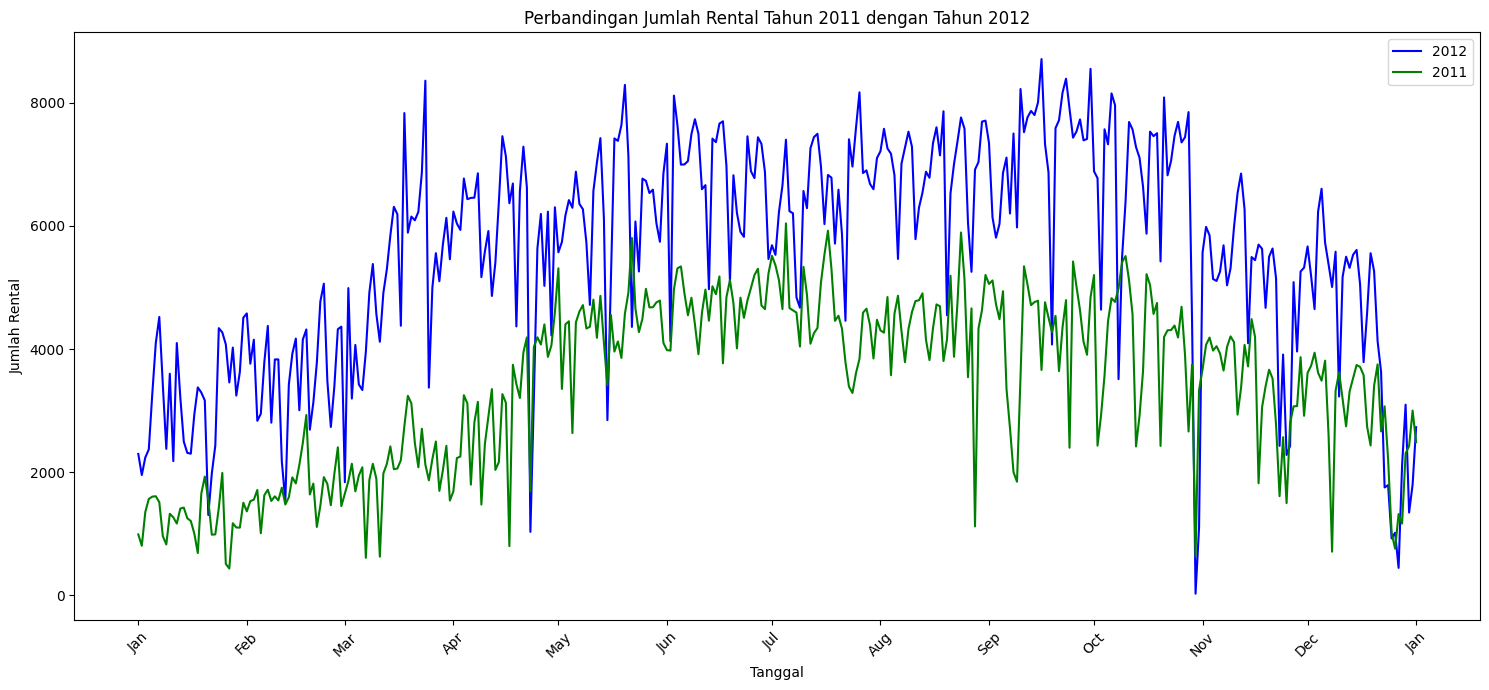

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(weekday_df_2012["dteday"], weekday_df_2012["cnt"], linestyle="-", color="b", label="2012")
plt.plot(weekday_df_2011["dteday"], weekday_df_2011["cnt"], linestyle="-", color="g", label="2011")

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Rental")
plt.title("Perbandingan Jumlah Rental Tahun 2011 dengan Tahun 2012")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

Line Plot yang di-**highlight** untuk memvisualisasikan tren jumlah rental pada **tahun 2011**.

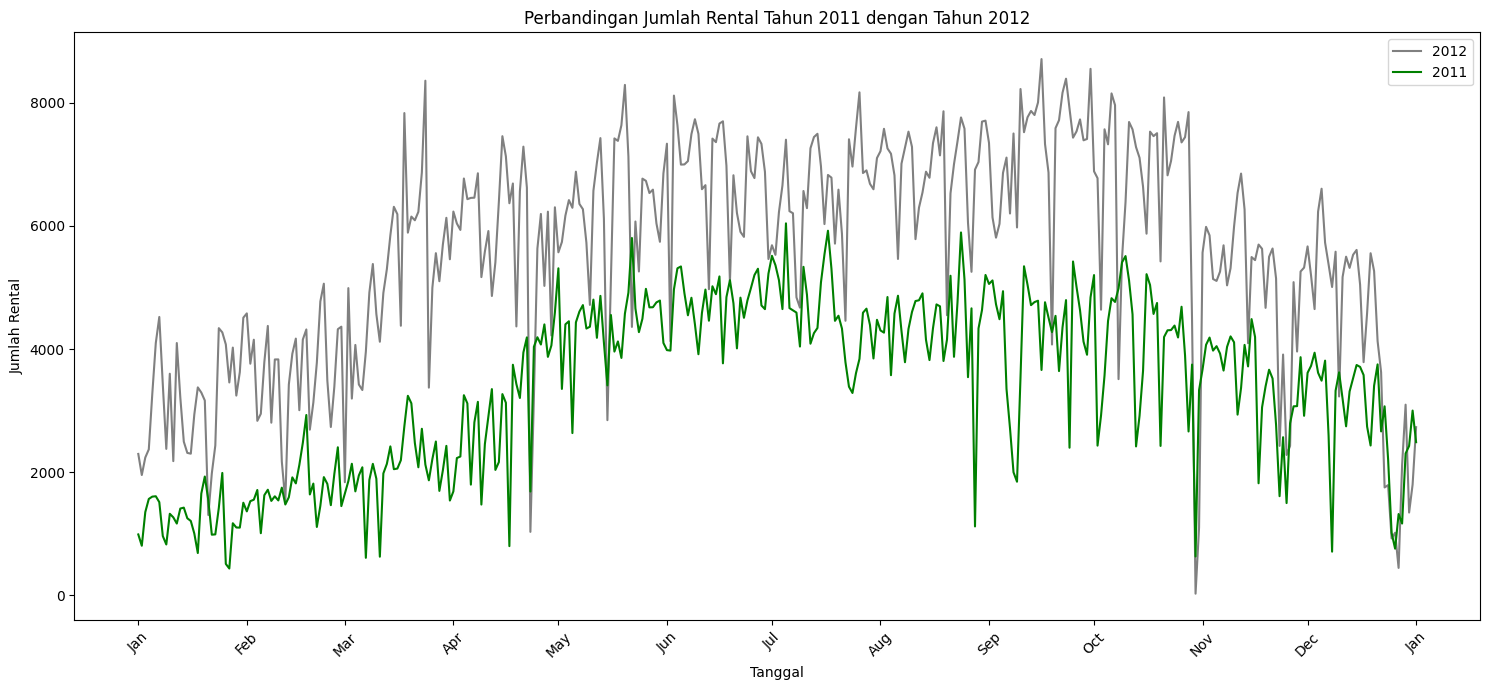

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(weekday_df_2012["dteday"], weekday_df_2012["cnt"], linestyle="-", color="gray", label="2012")
plt.plot(weekday_df_2011["dteday"], weekday_df_2011["cnt"], linestyle="-", color="g", label="2011")

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Rental")
plt.title("Perbandingan Jumlah Rental Tahun 2011 dengan Tahun 2012")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [26]:
weekday_df_2011.describe()

,cnt
count,365.000000
mean,3405.761644
std,1378.753666
min,431.000000
25%,2132.000000
50%,3740.000000
75%,4586.000000
max,6043.000000


Line Plot yang di-**highlight** untuk memvisualisasikan tren jumlah rental pada **tahun 2012**.

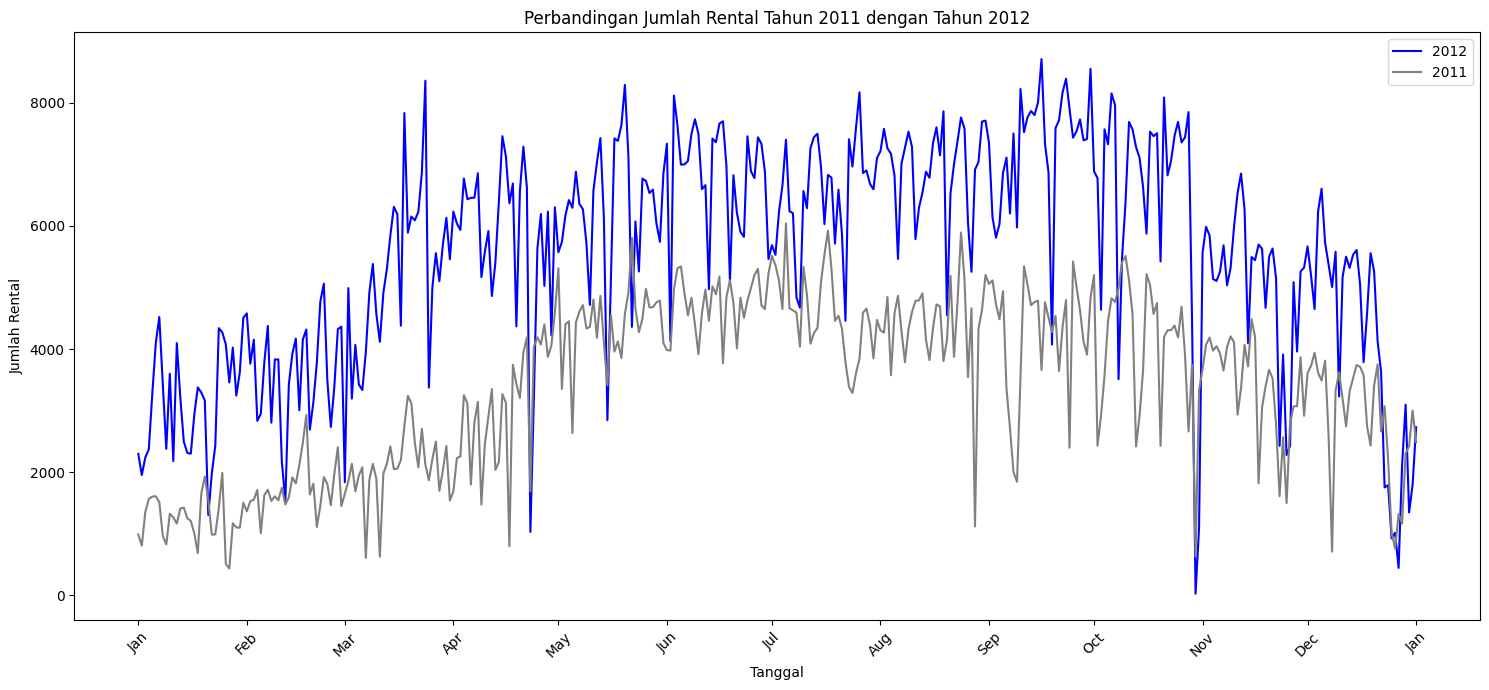

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(weekday_df_2012["dteday"], weekday_df_2012["cnt"], linestyle="-", color="b", label="2012")
plt.plot(weekday_df_2011["dteday"], weekday_df_2011["cnt"], linestyle="-", color="gray", label="2011")

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Rental")
plt.title("Perbandingan Jumlah Rental Tahun 2011 dengan Tahun 2012")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
weekday_df_2012.describe()

,cnt
count,366.000000
mean,5599.934426
std,1788.667868
min,22.000000
25%,4369.000000
50%,5927.000000
75%,7011.250000
max,8714.000000


### Insight

**Insight:**
- Mendapatkan Visualisasi Bar Chart untuk Pertanyaan 1, beserta explanatory-nya untuk mempermudah pembacaan visualisasi.
- Mendapatkan Visualisasi Line Plot untuk Pertanyaan 2, beserta explanatory dan highlight-nya untuk mempermudah pembacaan visualisasi.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Conclusion pertanyaan 1:** Semakin berat atau ekstrim kondisi cuaca (nilai kategori semakin besar), maka jumlah sepeda yang dirental setiap jamnya akan semakin sedikit. Berarti, orang-orang lebih enggan untuk merental sepeda jika kondisi cuaca kian memburuk. Selain itu, visualisasi juga menunjukkan bahwa lebih banyak orang yang merental sebagai pelanggan teregistrasi.


- **Conclusion pertanyaan 2:** Penjualan rental sepeda pada tahun 2012 cenderung lebih tinggi dibandingkan tahun 2011. Tahun 2011 memiliki rata-rata 3406 jumlah rental perhari, sedangkan pada tahun 2012 memiliki rata-rata 5600 jumlah rental perhari. Hal ini menunjukkan bisnis rental semakin meningkat seiring bergantinya tahun.